<div class="alert alert-success">
    
## Машинное обучение

## Практическое домашнее задание 3




# Для выполнения домашнего задания №3:

В этом задании вам следует обучить две модели: Логистическая регрессия, RandomForest. По всем обученным моделям должен быть проведен подбор параметров, и, при необходимости, применены инструменты для борьбы с переобучением.
 В качестве основной метрики, с помощью которой следует сравнивать производительность моделей, использовать площадь под ROC-кривой (AUC-ROC).
 Перед выполнением всех экспериментов и выбора лучшей модели, определите как вы будете оценивать качество: на тестовых данных, которые могут быть получены с помощью кросс-валидации или предварительно отобранной тестовой выборки из таблицы `features.csv`.
Не забываем, что в любом случае подбор гиперпараметров должен проводиться на кроссвалидации. После того, как найдете лучшие гиперпараметры с помощью GridSearch, инициализируйте модель с найденными лучшими гиперпараметрами. 

Для решения задания вам требуется выполнить следующие шаги:

1. Проведите EDA, не забудьте масштабировать данные, если это требуется. (1 балл)
2. Оцените качество моделей с помощью кросс-валидации, подберите при этом лучшие параметры. (2 балла, каждый по 0.5 с учётом ответов на вопросы)
  - Как долго проводилась кросс-валидация каждой выбранной вами модели? Инструкцию по измерению времени можно найти ниже по тексту.
  - Какое качество при этом получилось? В данном задании мы используем метрику качества AUC-ROC.
  - Как оно соотносится с качеством другой модели? Чем вы можете объяснить эту разницу?
  - Быстрее ли работает, Случайный лес по сравнению с Логистической регрессией? Время замерьте с помощью кода ниже.

3. Постройте предсказания вероятностей получения положительного класса для тестовой выборки с помощью лучшей из изученных моделей (лучшей с точки зрения AUC-ROC на кросс-валидации). Убедитесь, что предсказанные вероятности адекватные — находятся на отрезке [0, 1], не совпадают между собой (т.е. модель не получилась константной).  (1 балл)

4. В качестве метрики использовать площадь под ROC-кривой (AUC-ROC). Построить матрицу ошибок (Confusion Matrix). (1 балл)
5. Как правило исходно в задачах автоматически используется порог (threshold) равный 0.5, но мы можем его менять. (3 балла)

    - Как увеличение порога отразится на precision/recall?  
    На практике, перед нами всегда встает trade-off: уменьшить полноту взамен на большую точность или получить больше ложно положительных примеров взамен на больший recall.
    - Постройте на одном графике precision, recall и f1 score в зависимости от порога.
    - Найдите порог, который соответствует максимизации f1 score.

6.  Провести интерпретацию признаков с помощью `_features_importances/permutation_importance`, постройте bar plot. На основе полученных результатов описать выводы. (2 балла)  


**Обратите внимание**: высокое качество работы на кросс-валидации (близкое к 100\%) — это в первую очередь повод задуматься о том, правильно ли вы обучаете модель. Например, возможно, вы заглядываете в будущее.

*Немного о метрике качества:*

 `AUC-ROC` — это метрика качества для алгоритма, выдающего оценки принадлежности первому классу. Все три алгоритма — случайный лес, SVM и логистическая регрессия — умеют выдавать такие оценки. Для этого нужно получать предсказания с помощью функции predict\_proba. Эта функция возвращает два столбца: первый содержит оценки принадлежности нулевому классу, второй — первому классу. Вам нужны значения из второго столбца:

```
pred = model.predict_proba(X_test)[:, 1]
```

**Измерение времени работы кода**
```  
import time
import datetime

start_time = datetime.datetime.now()

time.sleep(3) # place the piece of code to be measured here

print 'Time elapsed:', datetime.datetime.now() - start_time
```

**Рекомендации и советы**

Если все работает очень медленно:

  - Используйте для обучения и кросс-валидации не всю выборку, а некоторое ее подмножество — например, половину объектов. Подмножество лучше всего брать случайным, а не формировать его из первых m объектов.
  - Попробуйте упростить модель — например, уменьшить глубину деревьев в (max\_depth).

# Описание задачи

## Предметная область: Игра Dota 2

[Dota 2](https://ru.wikipedia.org/wiki/Dota_2) — многопользовательская компьютерная игра жанра [MOBA](https://ru.wikipedia.org/wiki/MOBA). Игроки играют между собой матчи. В каждом матче участвует две команды, 5 человек в каждой. Одна команда играет за светлую сторону (The Radiant), другая — за тёмную (The Dire). Цель каждой команды — уничтожить главное здание базы противника (трон).

Существуют [разные режимы игры](http://dota2.gamepedia.com/Game_modes/ru), мы будем рассматривать режим [Captain's Mode](http://dota2.gamepedia.com/Game_modes/ru#Captain.27s_Mode), в формате которого происходит большая часть киберспортивных мероприятий по Dota 2.

### Как проходит матч

#### 1. Игроки выбирают героев

Всего в игре чуть более 100 различных героев (персонажей). В начале игры, команды в определенном порядке выбирают героев себе и запрещают выбирать определенных героев противнику (баны). Каждый игрок будет управлять одним героем, в рамках одного матча не может быть несколько одинаковых героев.  Герои различаются между собой своими характеристиками и способностями. От комбинации выбранных героев во многом зависит успех команды.

![](http://imgur.com/XFr4HYE.jpg)

#### 2. Основная часть

Игроки могут получать золото и опыт за убийство чужих героев или прочих юнитов. Накопленный опыт влияет на уровень героя, который в свою очередь позволяет улучшать способности. За накопленное золото игроки покупают предметы, которые улучшают характеристики героев или дают им новые способности.

После смерти герой отправляется в "таверну" и возрождается только по прошествии некоторого времени, таким образом команда на некоторое время теряет игрока, однако игрок может досрочно выкупить героя из таверны за определенную сумму золота.

В течение игры команды развивают своих героев, обороняют свою часть поля и нападают на вражескую.

![](http://imgur.com/5b0SlQb.jpg)

#### 3. Конец игры

Игра заканчивается, когда одна из команд разрушет определенное число "башен" противника и уничтожает трон.

![](http://imgur.com/Du79Kzf.jpg)

Признаки, представленные в таблице features.csv, по мнению экспертов в предметной области являются наиболее важными для решения задачи предсказания победы команды. Тем не менее, не обязательно использовать эти признаки в исходном виде для применения методов машинного обучения — вы можете сделать новые признаки из имеющихся.

*Материал частично базируется на задаче по соревнованию Kaggle Dota 2 Win Probability Prediction, проводимом в рамках проекта курса по Машинному Обучению на платформе Coursera.*

### Пример чтения файла с признаками

In [191]:
import pandas as pd

dota_df = pd.read_csv('features.csv', index_col='match_id')

dota_df.head()

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,duration,radiant_win,tower_status_radiant,tower_status_dire,barracks_status_radiant,barracks_status_dire
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,4,2,2,-52.0,2874,1,1796,0,51,0
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,4,3,1,-5.0,2463,1,1974,0,63,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,4,3,1,13.0,2130,0,0,1830,0,63
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,4,2,0,27.0,1459,0,1920,2047,50,63
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,3,3,0,-16.0,2449,0,4,1974,3,63


##### Описание признаков в таблице

- `match_id`: идентификатор матча в наборе данных
- `start_time`: время начала матча (unixtime)
- `lobby_type`: тип комнаты, в которой собираются игроки (расшифровка в `dictionaries/lobbies.csv`)
- Наборы признаков для каждого игрока (игроки команды Radiant — префикс `rN`, Dire — `dN`):
    - `r1_hero`: герой игрока (расшифровка в dictionaries/heroes.csv)
    - `r1_level`: максимальный достигнутый уровень героя (за первые 5 игровых минут)
    - `r1_xp`: максимальный полученный опыт
    - `r1_gold`: достигнутая ценность героя
    - `r1_lh`: число убитых юнитов
    - `r1_kills`: число убитых игроков
    - `r1_deaths`: число смертей героя
    - `r1_items`: число купленных предметов
- Признаки события "первая кровь" (first blood). Если событие "первая кровь" не успело произойти за первые 5 минут, то признаки принимают пропущенное значение
    - `first_blood_time`: игровое время первой крови
    - `first_blood_team`: команда, совершившая первую кровь (0 — Radiant, 1 — Dire)
    - `first_blood_player1`: игрок, причастный к событию
    - `first_blood_player2`: второй игрок, причастный к событию
- Признаки для каждой команды (префиксы `radiant_` и `dire_`)
    - `radiant_bottle_time`: время первого приобретения командой предмета "bottle"
    - `radiant_courier_time`: время приобретения предмета "courier"
    - `radiant_flying_courier_time`: время приобретения предмета "flying_courier"
    - `radiant_tpscroll_count`: число предметов "tpscroll" за первые 5 минут
    - `radiant_boots_count`: число предметов "boots"
    - `radiant_ward_observer_count`: число предметов "ward_observer"
    - `radiant_ward_sentry_count`: число предметов "ward_sentry"
    - `radiant_first_ward_time`: время установки командой первого "наблюдателя", т.е. предмета, который позволяет видеть часть игрового поля
- Итог матча (данные поля отсутствуют в тестовой выборке, поскольку содержат информацию, выходящую за пределы первых 5 минут матча)
    - `duration`: длительность
    - `radiant_win`: 1, если победила команда Radiant, 0 — иначе
    - Состояние башен и барраков к концу матча (см. описание полей набора данных)
        - `tower_status_radiant`
        - `tower_status_dire`
        - `barracks_status_radiant`
        - `barracks_status_dire`
     


### Вам следует предсказать победу команды за первые 5 игровых минут

In [192]:
# Удаляем поля duration, tower_status_radiant, tower_status_dire, barracks_status_radiant, barracks_status_dire
# Они содержат информацию о конце матча (у нас инфа только за первые 5 минут)
# (и забегая чуть вперед, с этими полями точность предсказания почти 100%)

dota_df = dota_df.drop(['duration', 'tower_status_radiant', 'tower_status_dire', 'barracks_status_radiant', 'barracks_status_dire'], axis=1)
dota_df

,start_time,lobby_type,r1_hero,r1_level,r1_xp,r1_gold,r1_lh,r1_kills,r1_deaths,r1_items,...,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_tpscroll_count,dire_boots_count,dire_ward_observer_count,dire_ward_sentry_count,dire_first_ward_time,radiant_win
match_id,,,,,,,,,,,,,,,,,,,,,
0,1430198770,7,11,5,2098,1489,20,0,0,7,...,35.0,103.0,-84.0,221.0,3,4,2,2,-52.0,1
1,1430220345,0,42,4,1188,1033,9,0,1,12,...,-20.0,149.0,-84.0,195.0,5,4,3,1,-5.0,1
2,1430227081,7,33,4,1319,1270,22,0,0,12,...,-39.0,45.0,-77.0,221.0,3,4,3,1,13.0,0
3,1430263531,1,29,4,1779,1056,14,0,0,5,...,-30.0,124.0,-80.0,184.0,0,4,2,0,27.0,0
4,1430282290,7,13,4,1431,1090,8,1,0,8,...,46.0,182.0,-80.0,225.0,6,3,3,0,-16.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114402,1450265551,1,47,4,1706,1198,17,0,1,8,...,-29.0,180.0,-76.0,180.0,3,4,3,0,-24.0,0
114403,1450277704,0,43,4,1793,1416,17,0,1,5,...,-5.0,NaN,-82.0,NaN,4,3,2,0,-17.0,1
114404,1450291848,1,98,4,1399,540,1,0,0,5,...,-32.0,249.0,-70.0,NaN,1,1,3,1,-15.0,0


In [193]:
# Получим список всех колонок с типом данных
for column in dota_df.columns:
    print(f"{column} ({dota_df[column].dtype})")

start_time (int64)
lobby_type (int64)
r1_hero (int64)
r1_level (int64)
r1_xp (int64)
r1_gold (int64)
r1_lh (int64)
r1_kills (int64)
r1_deaths (int64)
r1_items (int64)
r2_hero (int64)
r2_level (int64)
r2_xp (int64)
r2_gold (int64)
r2_lh (int64)
r2_kills (int64)
r2_deaths (int64)
r2_items (int64)
r3_hero (int64)
r3_level (int64)
r3_xp (int64)
r3_gold (int64)
r3_lh (int64)
r3_kills (int64)
r3_deaths (int64)
r3_items (int64)
r4_hero (int64)
r4_level (int64)
r4_xp (int64)
r4_gold (int64)
r4_lh (int64)
r4_kills (int64)
r4_deaths (int64)
r4_items (int64)
r5_hero (int64)
r5_level (int64)
r5_xp (int64)
r5_gold (int64)
r5_lh (int64)
r5_kills (int64)
r5_deaths (int64)
r5_items (int64)
d1_hero (int64)
d1_level (int64)
d1_xp (int64)
d1_gold (int64)
d1_lh (int64)
d1_kills (int64)
d1_deaths (int64)
d1_items (int64)
d2_hero (int64)
d2_level (int64)
d2_xp (int64)
d2_gold (int64)
d2_lh (int64)
d2_kills (int64)
d2_deaths (int64)
d2_items (int64)
d3_hero (int64)
d3_level (int64)
d3_xp (int64)
d3_gold (int

Все данные числовые

In [194]:
# Размеры датасета

dota_df.shape

(97230, 103)

In [195]:
# Проверим пропуски

def checkNullData():
    null_dict = {}
    null_sum = 0

    # Проходимся по всем колонках
    for column in dota_df:
        if dota_df[column].isnull().sum() > 0:
            # Добавляем в словарь название колонки и количество пропусков
            null_dict[dota_df[column].name] = dota_df[column].isnull().sum()
            # Сумма всех пропусков
            null_sum += dota_df[column].isnull().sum()

    # преобразование словаря в DataFrame (для красивого отображения)
    null_dict_df = pd.DataFrame(list(null_dict.items()), columns=['Column name', 'Null count'])
    
    print(null_dict_df)

    print(f"Всего в общем: {null_sum}")

checkNullData()

                    Column name  Null count
0              first_blood_time       19553
1              first_blood_team       19553
2           first_blood_player1       19553
3           first_blood_player2       43987
4           radiant_bottle_time       15691
5          radiant_courier_time         692
6   radiant_flying_courier_time       27479
7       radiant_first_ward_time        1836
8              dire_bottle_time       16143
9             dire_courier_time         676
10     dire_flying_courier_time       26098
11         dire_first_ward_time        1826
Всего в общем: 193087


In [196]:
dota_df[['first_blood_team', 'first_blood_player1', 'first_blood_player2', 'first_blood_time', 'radiant_bottle_time', 'radiant_courier_time', 'radiant_flying_courier_time', 'radiant_first_ward_time', 'dire_bottle_time', 'dire_courier_time', 'dire_flying_courier_time', 'dire_first_ward_time']].describe()

,first_blood_team,first_blood_player1,first_blood_player2,first_blood_time,radiant_bottle_time,radiant_courier_time,radiant_flying_courier_time,radiant_first_ward_time,dire_bottle_time,dire_courier_time,dire_flying_courier_time,dire_first_ward_time
count,77677.000000,77677.000000,53243.000000,77677.000000,81539.000000,96538.000000,69751.000000,95394.000000,81087.000000,96554.000000,71132.000000,95404.000000
mean,0.521815,4.593483,4.383224,97.688029,126.800255,-80.059510,215.987126,-6.875747,127.215028,-80.191893,214.870536,-6.901922
std,0.499527,2.886984,2.870915,82.625879,61.427907,15.814209,34.604997,39.508650,62.442018,15.261950,34.137158,40.701397
min,0.000000,0.000000,0.000000,-78.000000,-37.000000,-90.000000,180.000000,-236.000000,-45.000000,-90.000000,180.000000,-84.000000
25%,0.000000,2.000000,2.000000,15.000000,84.000000,-86.000000,186.000000,-31.000000,83.000000,-86.000000,185.000000,-31.000000
50%,1.000000,5.000000,4.000000,93.000000,131.000000,-83.000000,204.000000,-15.000000,131.000000,-84.000000,203.000000,-16.000000
75%,1.000000,7.000000,7.000000,155.000000,164.000000,-79.000000,241.000000,9.000000,165.000000,-79.000000,238.000000,8.000000
max,1.000000,9.000000,9.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,296.000000,300.000000,300.000000


Судя по всему, если в этих колонках null, значит этого не было (т.е. не было первой крови, не купили ботл, куру, варды). Везде, где time можно поставить -250 (меньше минимального значения среди этих колонок). Где первая кровь ставим -1, т.к. 0 и 1 - это обозначение команд (или булево)

In [197]:
for column in dota_df:
    if(dota_df[column].isnull().sum() > 0):
        # Если есть пропуски и колонка числовая
        if(dota_df[column].dtype == int or dota_df[column].dtype == float):
            if column in ['first_blood_team', 'first_blood_player1', 'first_blood_player2']:
                dota_df[column] = dota_df[column].fillna(-1)
            else:
                dota_df[column] = dota_df[column].fillna(-250)
        # Для строк
        else:
            dota_df[column] = dota_df[column].fillna("")

checkNullData()

Empty DataFrame
Columns: [Column name, Null count]
Index: []
Всего в общем: 0


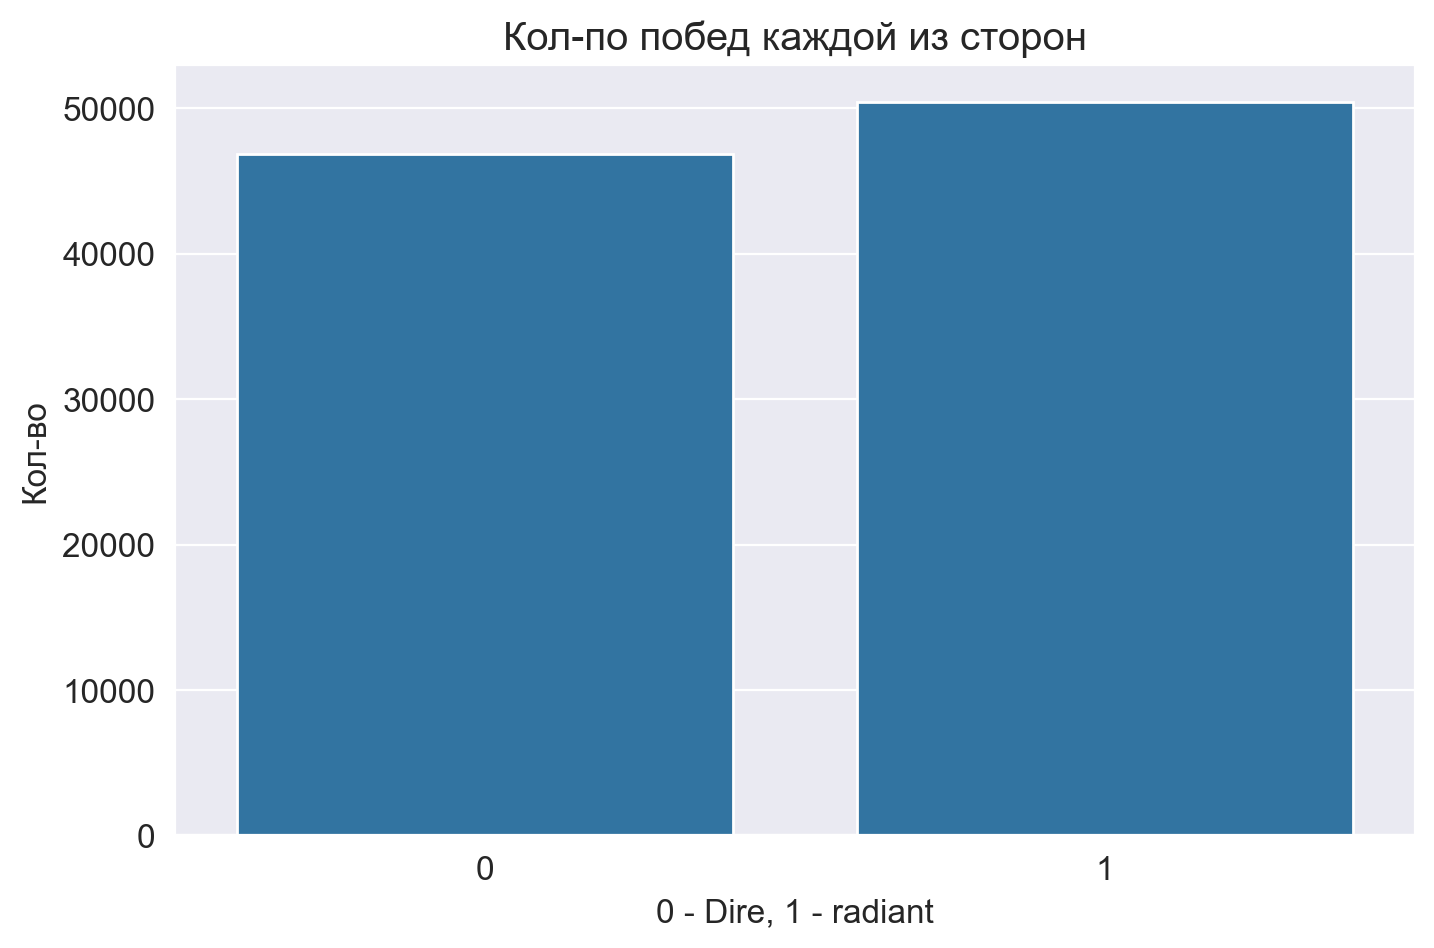

In [198]:
# Чуть чуть исследования
# Какая команда побеждает чаще?

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

sns.countplot(x = dota_df['radiant_win'])
plt.title('Кол-по побед каждой из сторон')
plt.ylabel('Кол-во')
plt.xlabel('0 - Dire, 1 - radiant')
plt.show()

Radiant побеждают чуть чуть чаще

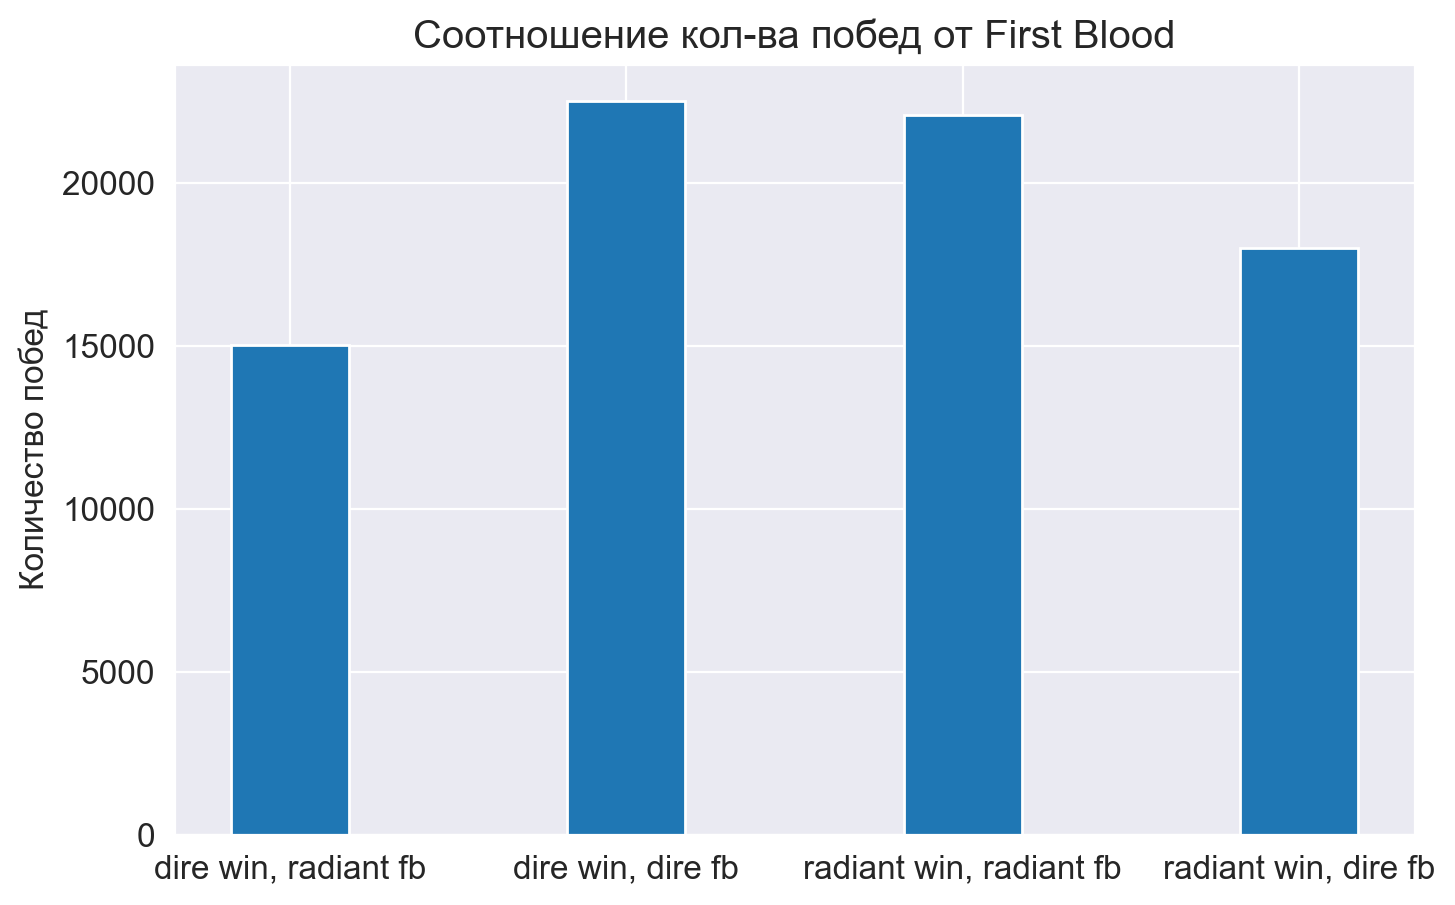

In [199]:
# Завимость победы от first blood

import numpy as np

win_fb = dota_df.groupby(['radiant_win', 'first_blood_team']).size()
data = [int(win_fb[0][0]), int(win_fb[0][1]), int(win_fb[1][0]), int(win_fb[1][1])]
labels = ['dire win, radiant fb', 'dire win, dire fb', 'radiant win, radiant fb', 'radiant win, dire fb']
x = np.arange(len(labels))  # Расположение столбцов по оси x
width = 0.35  # Ширина столбцов
fig, ax = plt.subplots()

f = ax.bar(x, data, width)
ax.set_ylabel('Количество побед')
ax.set_title('Соотношение кол-ва побед от First Blood')
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.show()

Команда побеждает чаще, если она делает первую кровь

In [200]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

numerical = []
for column in dota_df.columns:
    # if column != 'radiant_win':
    if column not in ['radiant_win']:
        numerical.append(column)

# Масштабируем данные
column_transformer = ColumnTransformer([
    ('scaling', StandardScaler(), numerical)
])

# Берем примерно 15 000 случайных строк
dota_df = dota_df.sample(frac=0.25)

# Разбиваем на тренировочную и тестовую выборки
y = dota_df['radiant_win']
#X = dota_df.drop("radiant_win", axis=1)
X = dota_df[numerical]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [201]:
# Кросс валидация логистической регрессии

from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, make_scorer
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import datetime
from sklearn.inspection import permutation_importance


params = {
    'log_r__C'       : np.logspace(-3,3,7),
    'log_r__solver'  : ['saga','lbfgs', 'liblinear'],
}

pipeline = Pipeline([
    ('scaling', column_transformer),
    ('log_r', LogisticRegression(max_iter=1000))
])

start_time = datetime.datetime.now()
grid_search = GridSearchCV(pipeline, param_grid = params, scoring = 'roc_auc', cv = 5, n_jobs=-1, verbose=10)

grid_search.fit(X_train, y_train)
print('Time elapsed:', datetime.datetime.now() - start_time)

# Тренировочная выборка
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший AUC-ROC:", grid_search.best_score_)

# Тестовая выборка
best_model_reg = grid_search.best_estimator_
importances_reg = permutation_importance(best_model_reg, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42) 
y_pred_proba_reg = best_model_reg.predict_proba(X_test)[:, 1]  # Вероятности для класса 1
test_auc_roc = roc_auc_score(y_test, y_pred_proba_reg)
print("AUC-ROC на тестовой выборке:", test_auc_roc)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Time elapsed: 0:00:16.841507
Лучшие параметры: {'log_r__C': np.float64(0.01), 'log_r__solver': 'saga'}
Лучший AUC-ROC: 0.712994081494448
AUC-ROC на тестовой выборке: 0.7161514937980504


In [202]:
# оценки коэффициентов
def checkCoef(model_name):
    mark_list = {}

    marks = best_model_reg[model_name].coef_
    i = 0
    # Название трансформированных столбцов
    for name in best_model_reg['scaling'].get_feature_names_out():
        mark_list[name] = marks[0][i]
        i += 1

    sorted(mark_list.items(), key=lambda item: item[1])
    marks_list_df = pd.DataFrame(list(mark_list.items()), columns=['Column name', 'Mark'])
        
    print(marks_list_df.sort_values(by='Mark', ascending=False))

checkCoef('log_r')

         Column name      Mark
29  scaling__r4_gold  0.216909
5   scaling__r1_gold  0.210360
14    scaling__r2_lh  0.169445
13  scaling__r2_gold  0.159343
38    scaling__r5_lh  0.154368
..               ...       ...
53  scaling__d2_gold -0.156664
54    scaling__d2_lh -0.159456
70    scaling__d4_lh -0.165580
61  scaling__d3_gold -0.195139
45  scaling__d1_gold -0.252106

[102 rows x 2 columns]


In [203]:
# Кросс валидация случайного леса

from sklearn.ensemble import RandomForestClassifier

params = {
    'rf__n_estimators': [50, 100, 200],  # Количество деревьев
    'rf__max_depth': [5, 10],  # Максимальная глубина дерева
    'rf__min_samples_split': [2, 5, 10],  # Минимальное количество выборок для разделения узла
    'rf__min_samples_leaf': [1, 2, 4]  # Минимальное количество выборок в листе
}

pipeline = Pipeline([
    ('scaling', column_transformer),
    ('rf', RandomForestClassifier())
])

start_time = datetime.datetime.now()
grid_search = GridSearchCV(pipeline, param_grid = params, scoring = 'roc_auc', cv = 5, n_jobs=-1, verbose=10)

grid_search.fit(X_train, y_train)
print('Time elapsed:', datetime.datetime.now() - start_time)

# Тренировочная выборка
print("Лучшие параметры:", grid_search.best_params_)
print("Лучший AUC-ROC:", grid_search.best_score_)

# Тестовая выборка
best_model_forest = grid_search.best_estimator_
# importances_forest = grid_search.best_estimator_._final_estimator.feature_importances_
importances_forest = permutation_importance(best_model_forest, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42) 
y_pred_proba_forest = best_model_forest.predict_proba(X_test)[:, 1]  # Вероятности для класса 1
test_auc_roc = roc_auc_score(y_test, y_pred_proba_forest)
print("AUC-ROC на тестовой выборке:", test_auc_roc)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Time elapsed: 0:01:34.265371
Лучшие параметры: {'rf__max_depth': 10, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}
Лучший AUC-ROC: 0.6994521920739648
AUC-ROC на тестовой выборке: 0.6970157164237984


**Ответ**: Кросс-валидация логистической регрессии заняла намного меньше времени в сравнении с лесом (16 секунд против полторы минуты, процессор ryzen 7 7735HS). Но это еще связяано с тем, что для леса нужна подобрать больше параметров (270 обучений для леса и 105 для регрессии). При этом качество (размер ошибки) регрессии что на тренировочной, что на тестовой выборках лучше. Это связано с тем, что данные довольно структурированы, и на плоскости располагаются примерно в одной зоне.

In [204]:
y_pred_proba_forest

array([0.58375138, 0.55653205, 0.34309978, ..., 0.54932112, 0.48800862,
       0.43692184], shape=(7293,))

In [205]:
y_pred_proba_reg

array([0.63691311, 0.54472585, 0.22922665, ..., 0.36488807, 0.29491526,
       0.32498154], shape=(7293,))

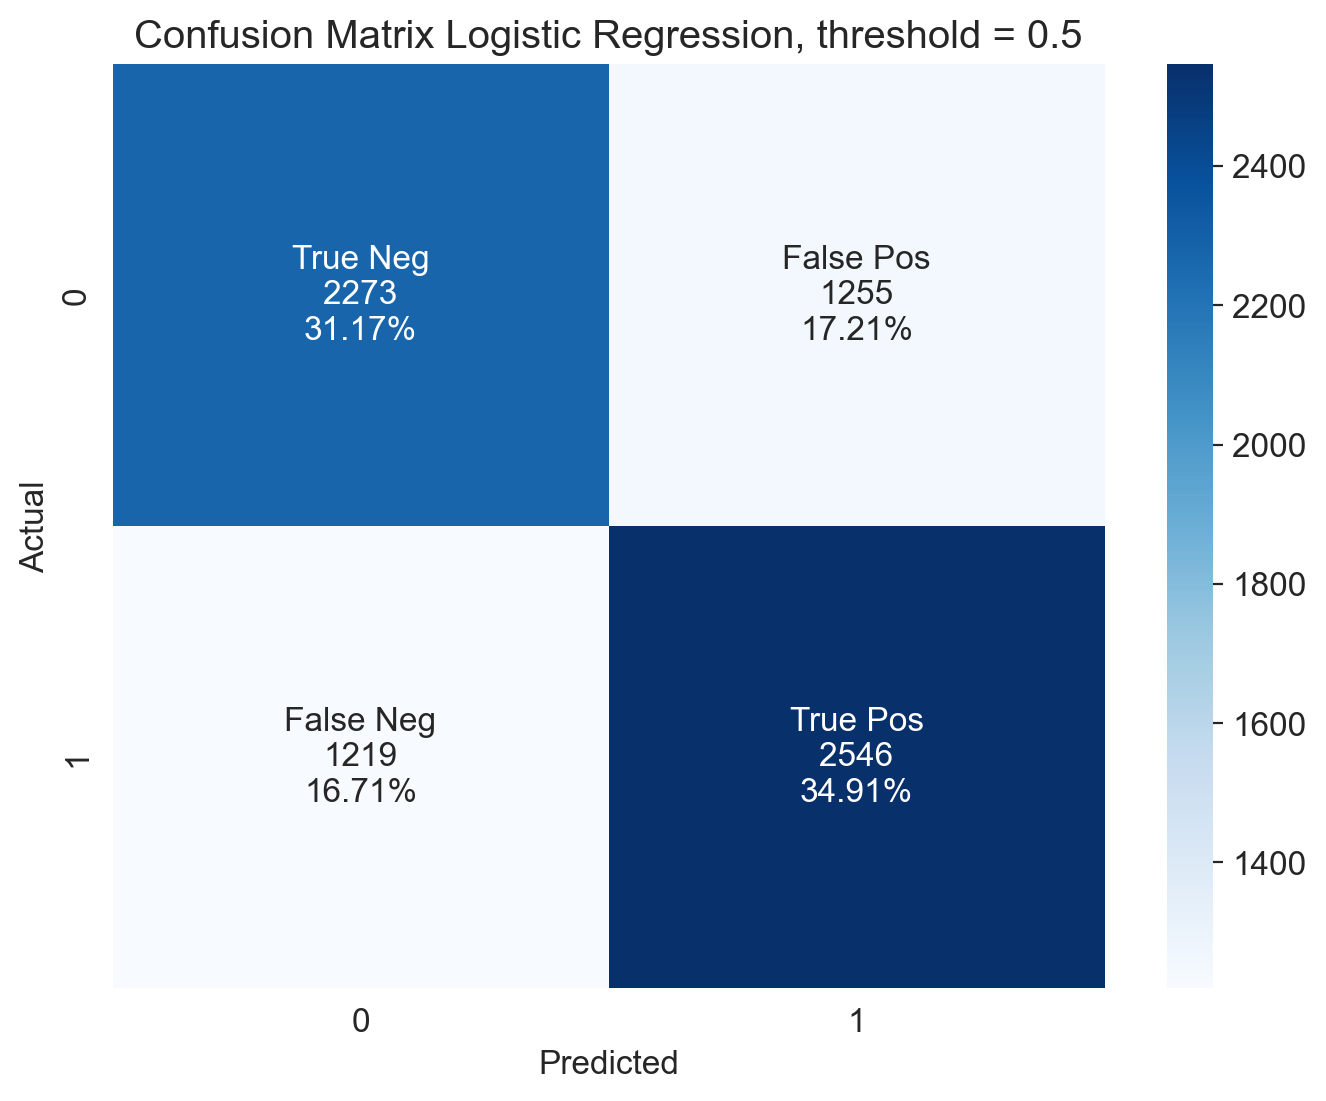

In [206]:
# Confusion Matrinx для регрессии

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


def RegConfusionMatrix(threshold_reg):
    predictions_reg = (y_pred_proba_reg >= threshold_reg).astype(int)

    cm = confusion_matrix(y_test, predictions_reg)

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)] # Преобразуем в проценты
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)] 

    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    plt.ylabel('Actual') 
    plt.xlabel('Predicted') 
    plt.title(f"Confusion Matrix Logistic Regression, threshold = {threshold_reg}")
    plt.show()

RegConfusionMatrix(0.5)

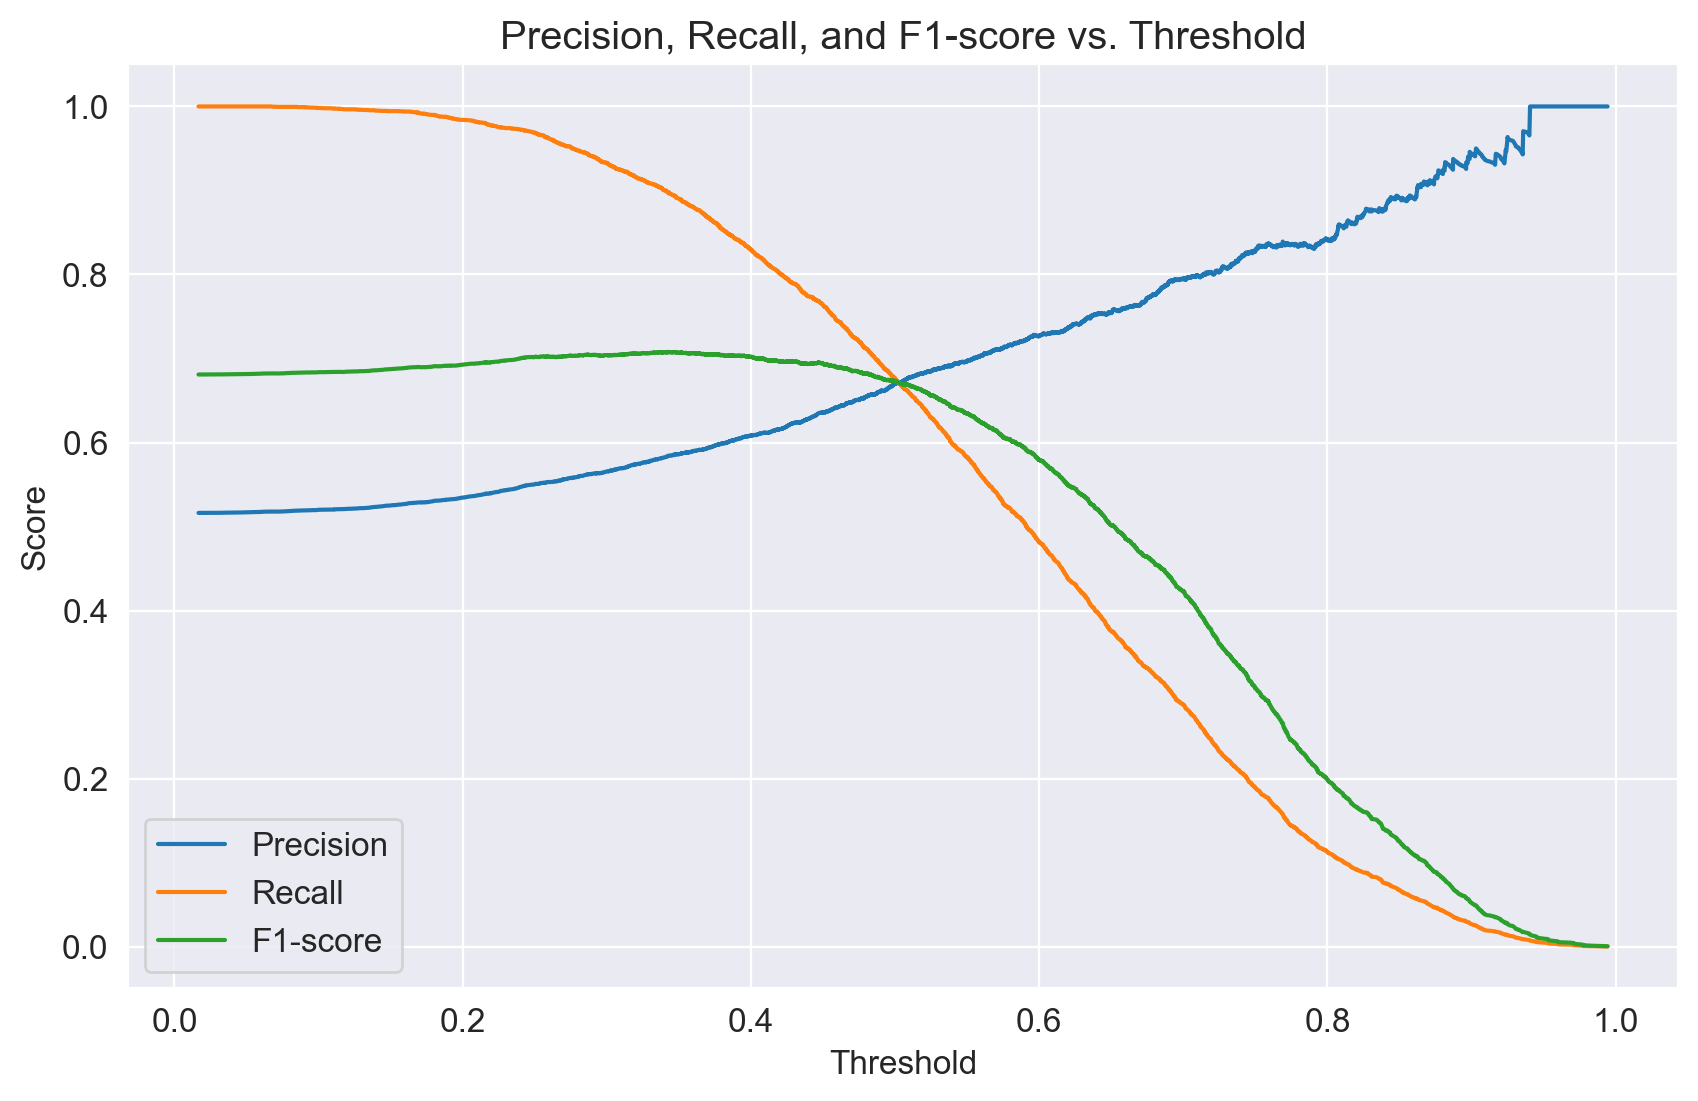

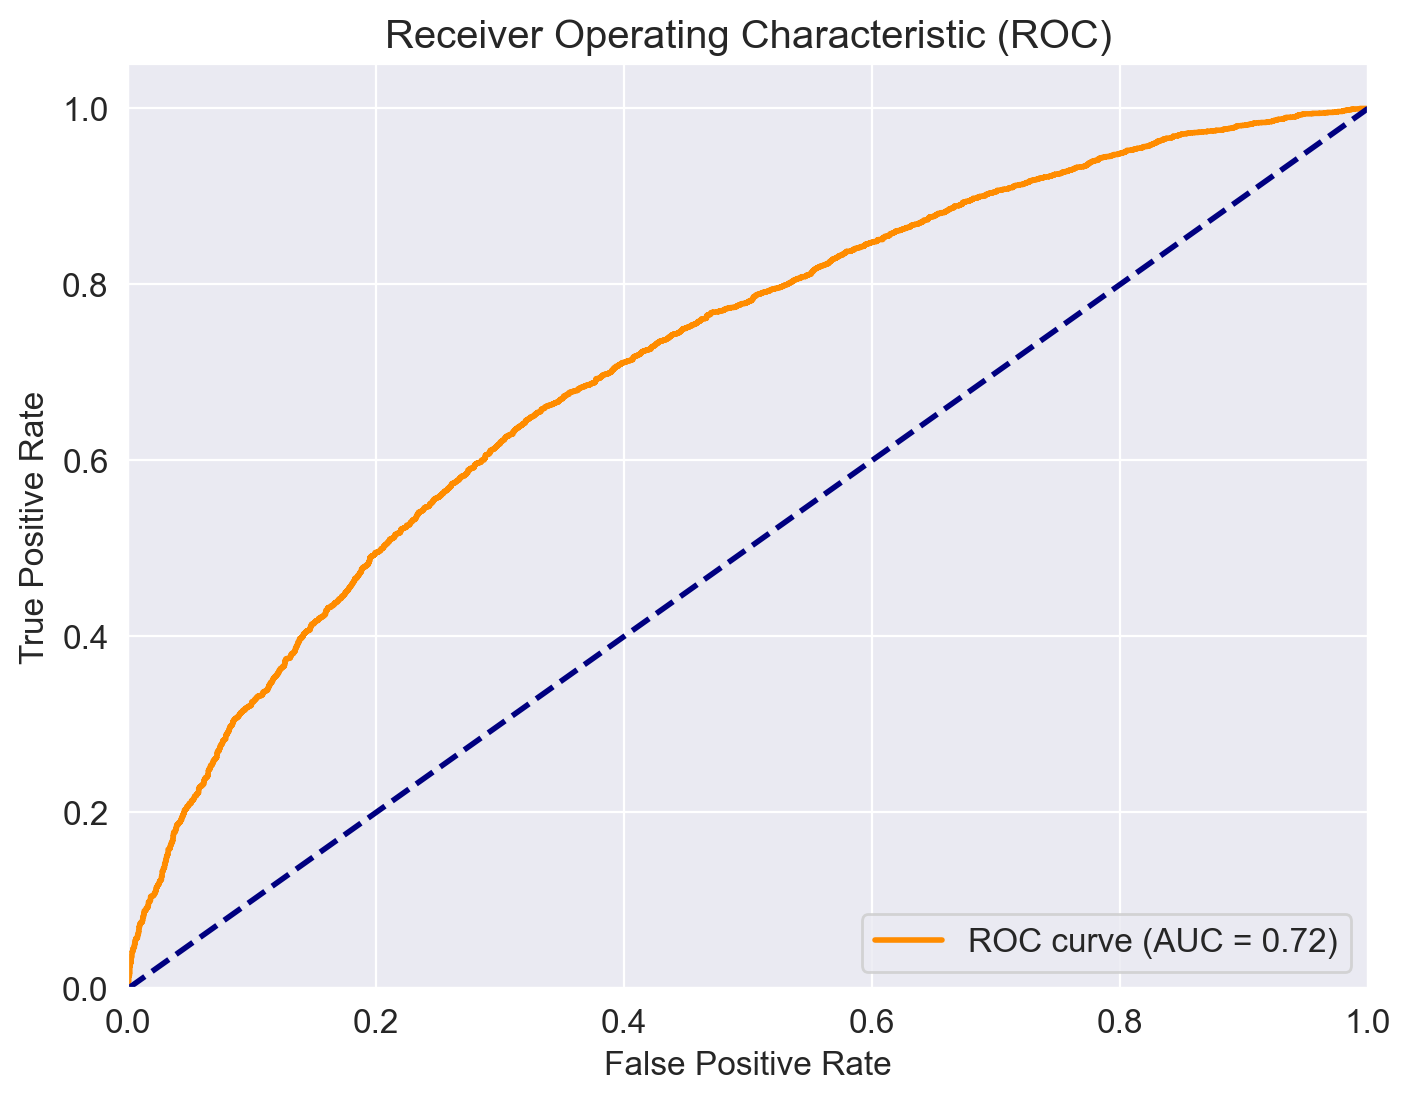

In [207]:
# precision, recall, F1 для регрессии
# Recall демонстрирует способность алгоритма обнаруживать данный класс вообще, а precision — способность отличать этот класс от других классов.
# метрика F1 грубо говоря объединяет их (больше - лучше)

from sklearn.metrics import precision_recall_curve, roc_curve, auc

precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba_reg)

f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1]) # Избегаем деления на ноль и убираем последний элемент (он всегда равен 1)

# график precision, recall и F1-score
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label='Precision')  # Убираем последний элемент, чтобы соответствовать длине thresholds
plt.plot(thresholds, recalls[:-1], label='Recall') # Убираем последний элемент, чтобы соответствовать длине thresholds
plt.plot(thresholds, f1_scores, label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Рассчитаем ROC-кривую и AUC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba_reg)
roc_auc = auc(fpr, tpr)

# график ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Диагональная линия (случайный классификатор)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


В результате для регрессии лучший порог примерно 0.35

In [208]:
from sklearn.metrics import f1_score, precision_score, recall_score


threshold_reg = 0.35
predictions_reg = (y_pred_proba_reg >= threshold_reg).astype(int)

f1 = f1_score(y_test, predictions_reg)
precision = precision_score(y_test, predictions_reg)
recall = recall_score(y_test, predictions_reg)

print(f"F1 для регрессии: {f1}")
print(f"Precision для регрессии: {precision}")
print(f"Recall для регрессии: {recall}")

F1 для регрессии: 0.7067383739322999
Precision для регрессии: 0.5860440713536201
Recall для регрессии: 0.8900398406374502


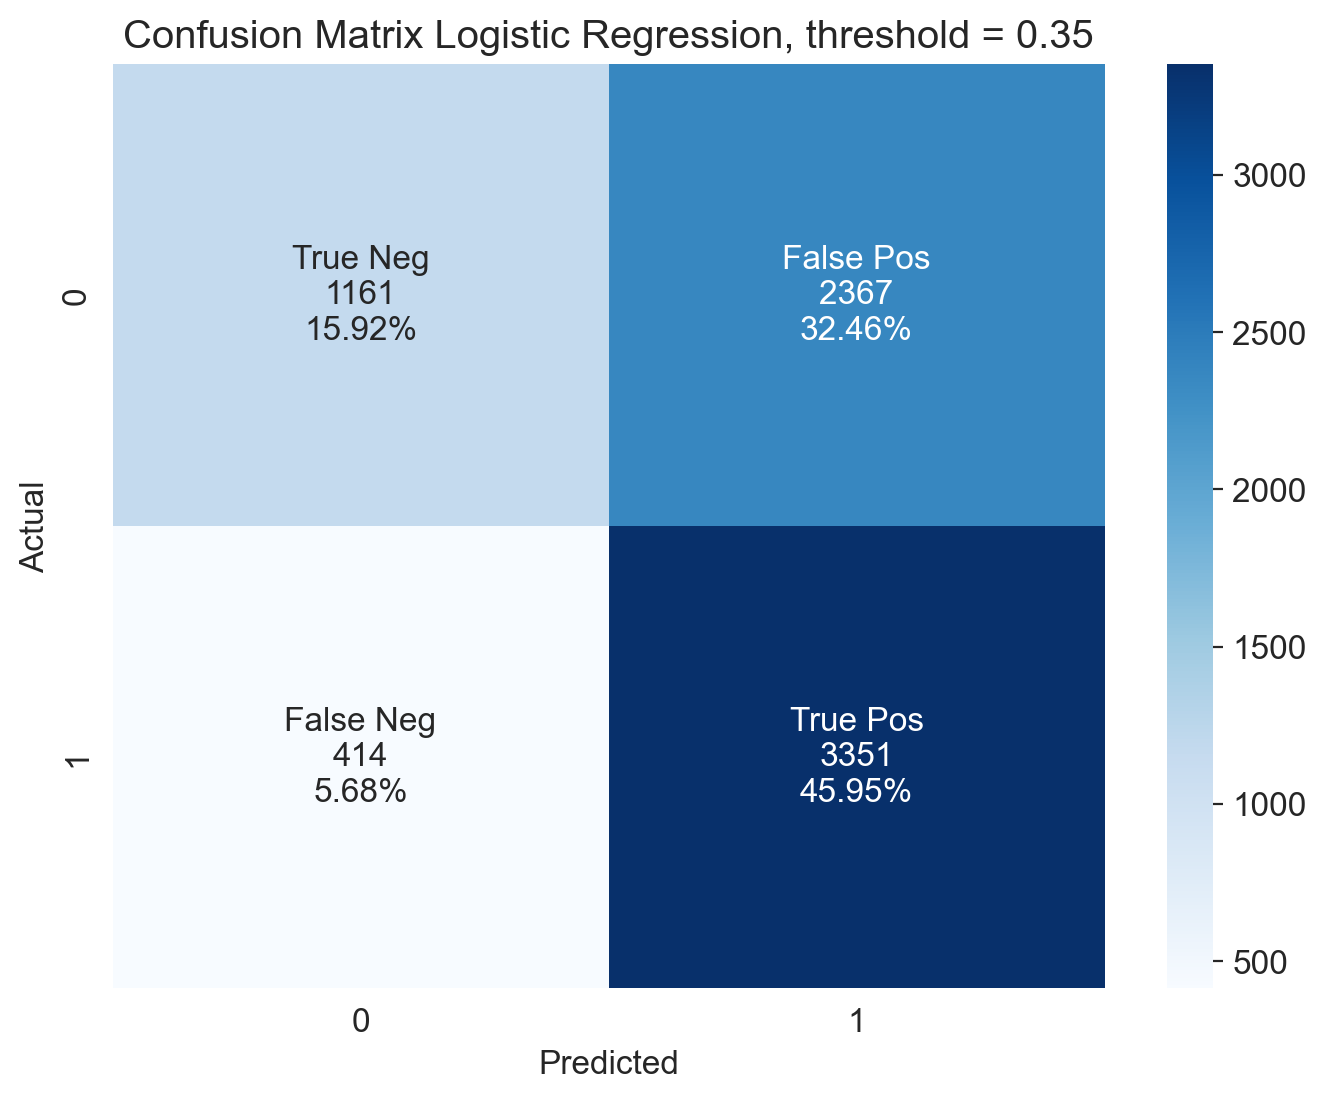

In [209]:
RegConfusionMatrix(0.35)

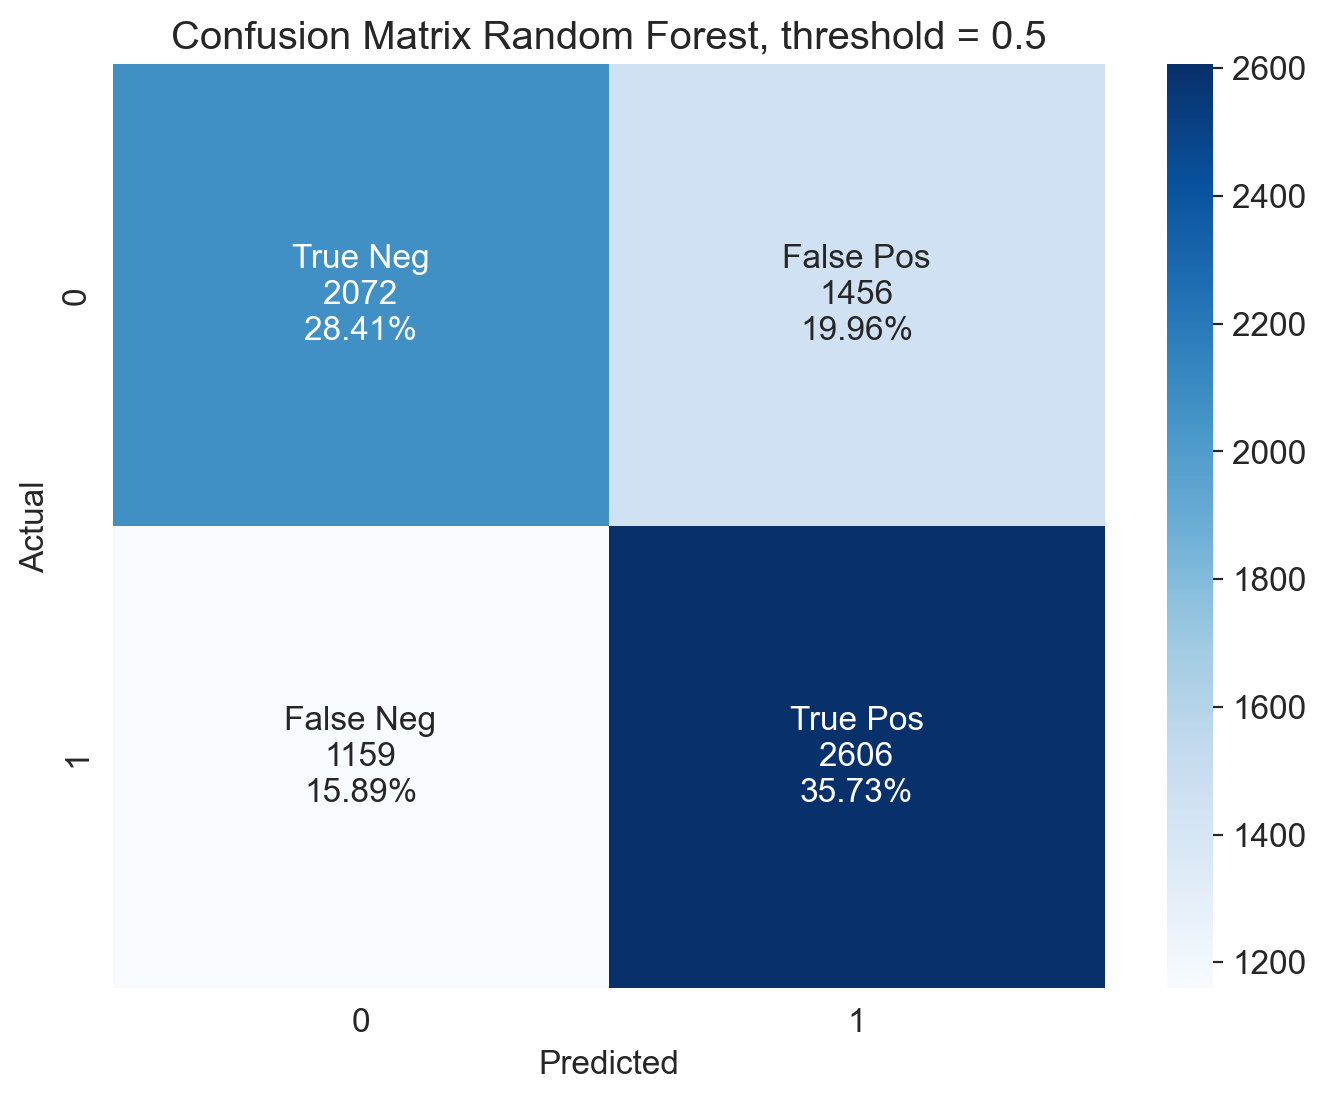

In [210]:
# Confusion Matrinx для леса

def ForestConfusionMatrix(threshold_forest):
    predictions_forest = (y_pred_proba_forest >= threshold_forest).astype(int)

    cm = confusion_matrix(y_test, predictions_forest)

    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)] # Преобразуем в проценты
    labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)] 

    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize=(8,6))
    sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')
    plt.ylabel('Actual') 
    plt.xlabel('Predicted') 
    plt.title(f"Confusion Matrix Random Forest, threshold = {threshold_forest}")
    plt.show()

ForestConfusionMatrix(0.5)

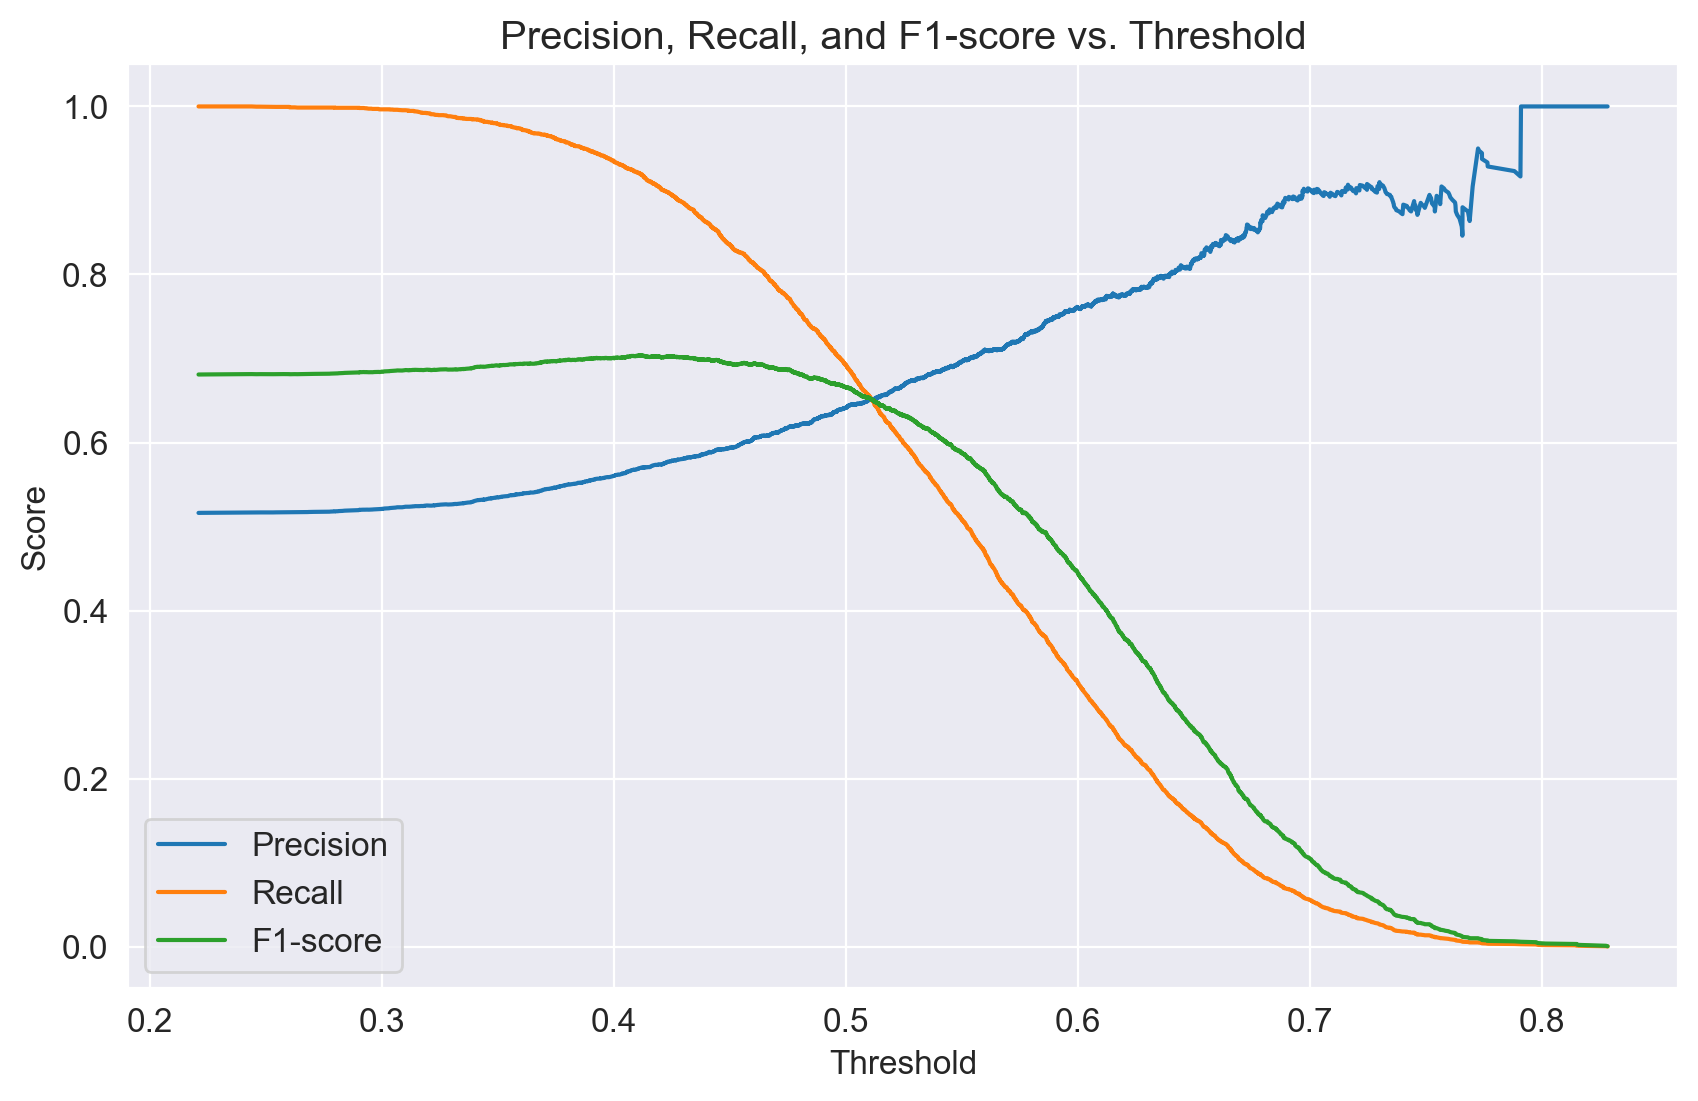

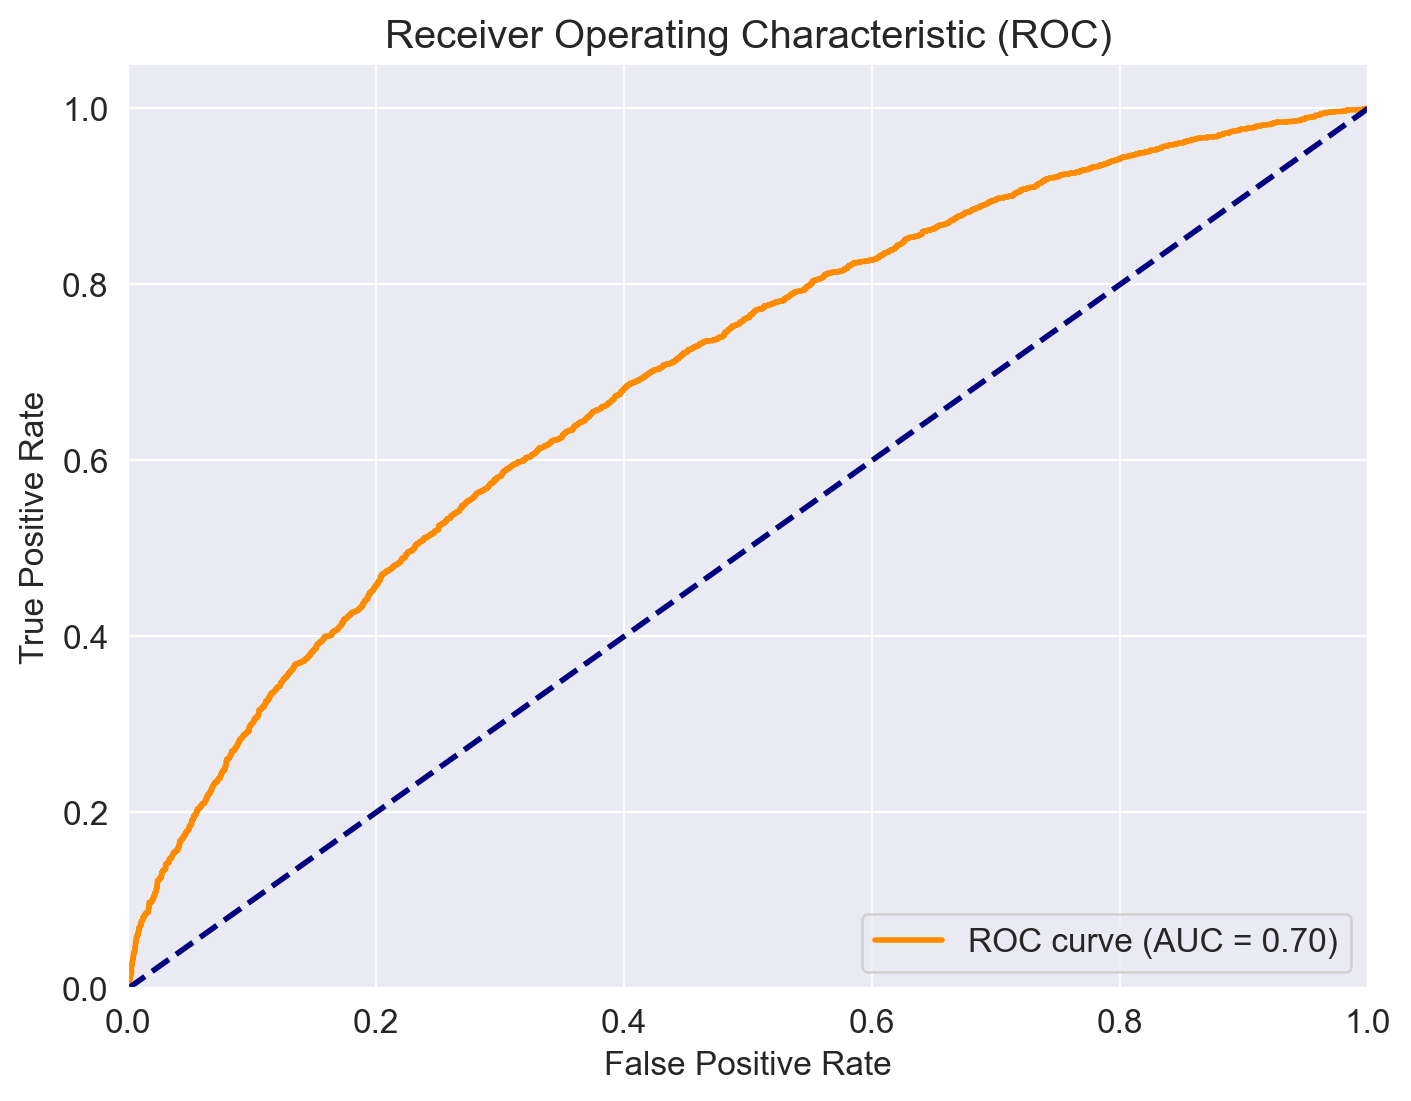

In [211]:
# precision, recall, F1 для леса
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba_forest)

f1_scores = 2 * (precisions[:-1] * recalls[:-1]) / (precisions[:-1] + recalls[:-1]) # Избегаем деления на ноль и убираем последний элемент (он всегда равен 1)

# график precision, recall и F1-score
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions[:-1], label='Precision')  # Убираем последний элемент, чтобы соответствовать длине thresholds
plt.plot(thresholds, recalls[:-1], label='Recall') # Убираем последний элемент, чтобы соответствовать длине thresholds
plt.plot(thresholds, f1_scores, label='F1-score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Рассчитаем ROC-кривую и AUC
fpr, tpr, thresholds_roc = roc_curve(y_test, y_pred_proba_forest)
roc_auc = auc(fpr, tpr)

# график ROC-кривой
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Диагональная линия (случайный классификатор)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

В случае с лесом лучший порог чуть больше - примерно 0.42

In [216]:
threshold_forest = 0.42
predictions_forest = (y_pred_proba_forest >= threshold_forest).astype(int)

f1 = f1_score(y_test, predictions_forest)
precision = precision_score(y_test, predictions_forest)
recall = recall_score(y_test, predictions_forest)

print(f"F1 для леса: {f1}")
print(f"Precision для леса: {precision}")
print(f"Recall для леса: {recall}")

F1 для леса: 0.7017652524001239
Precision для леса: 0.5739614994934144
Recall для леса: 0.902788844621514


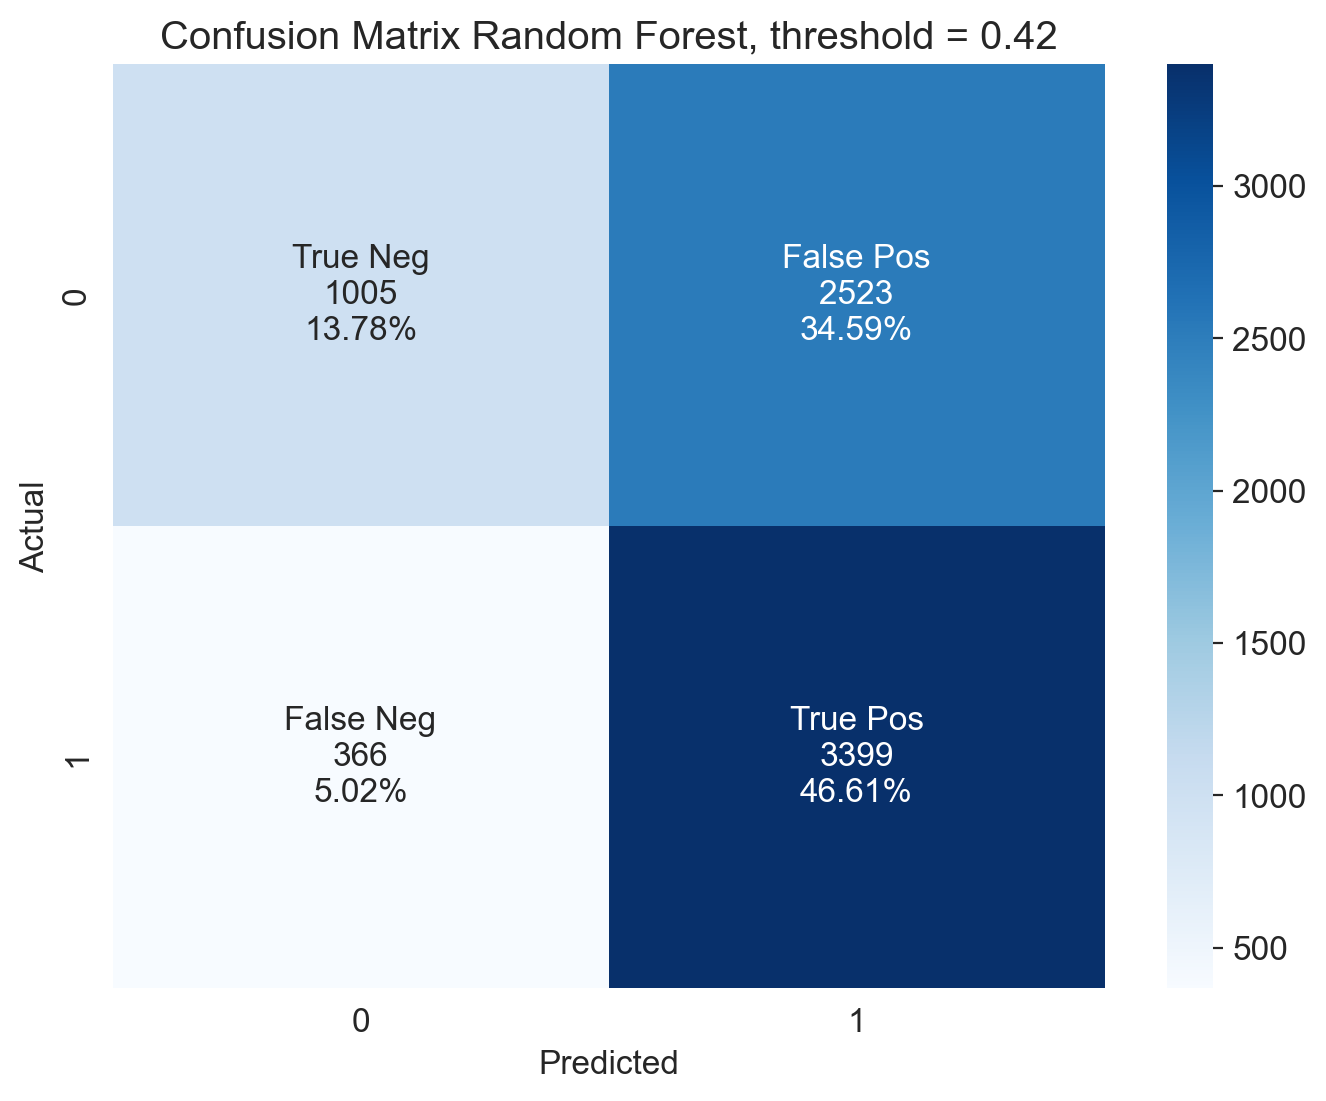

In [213]:
ForestConfusionMatrix(0.42)

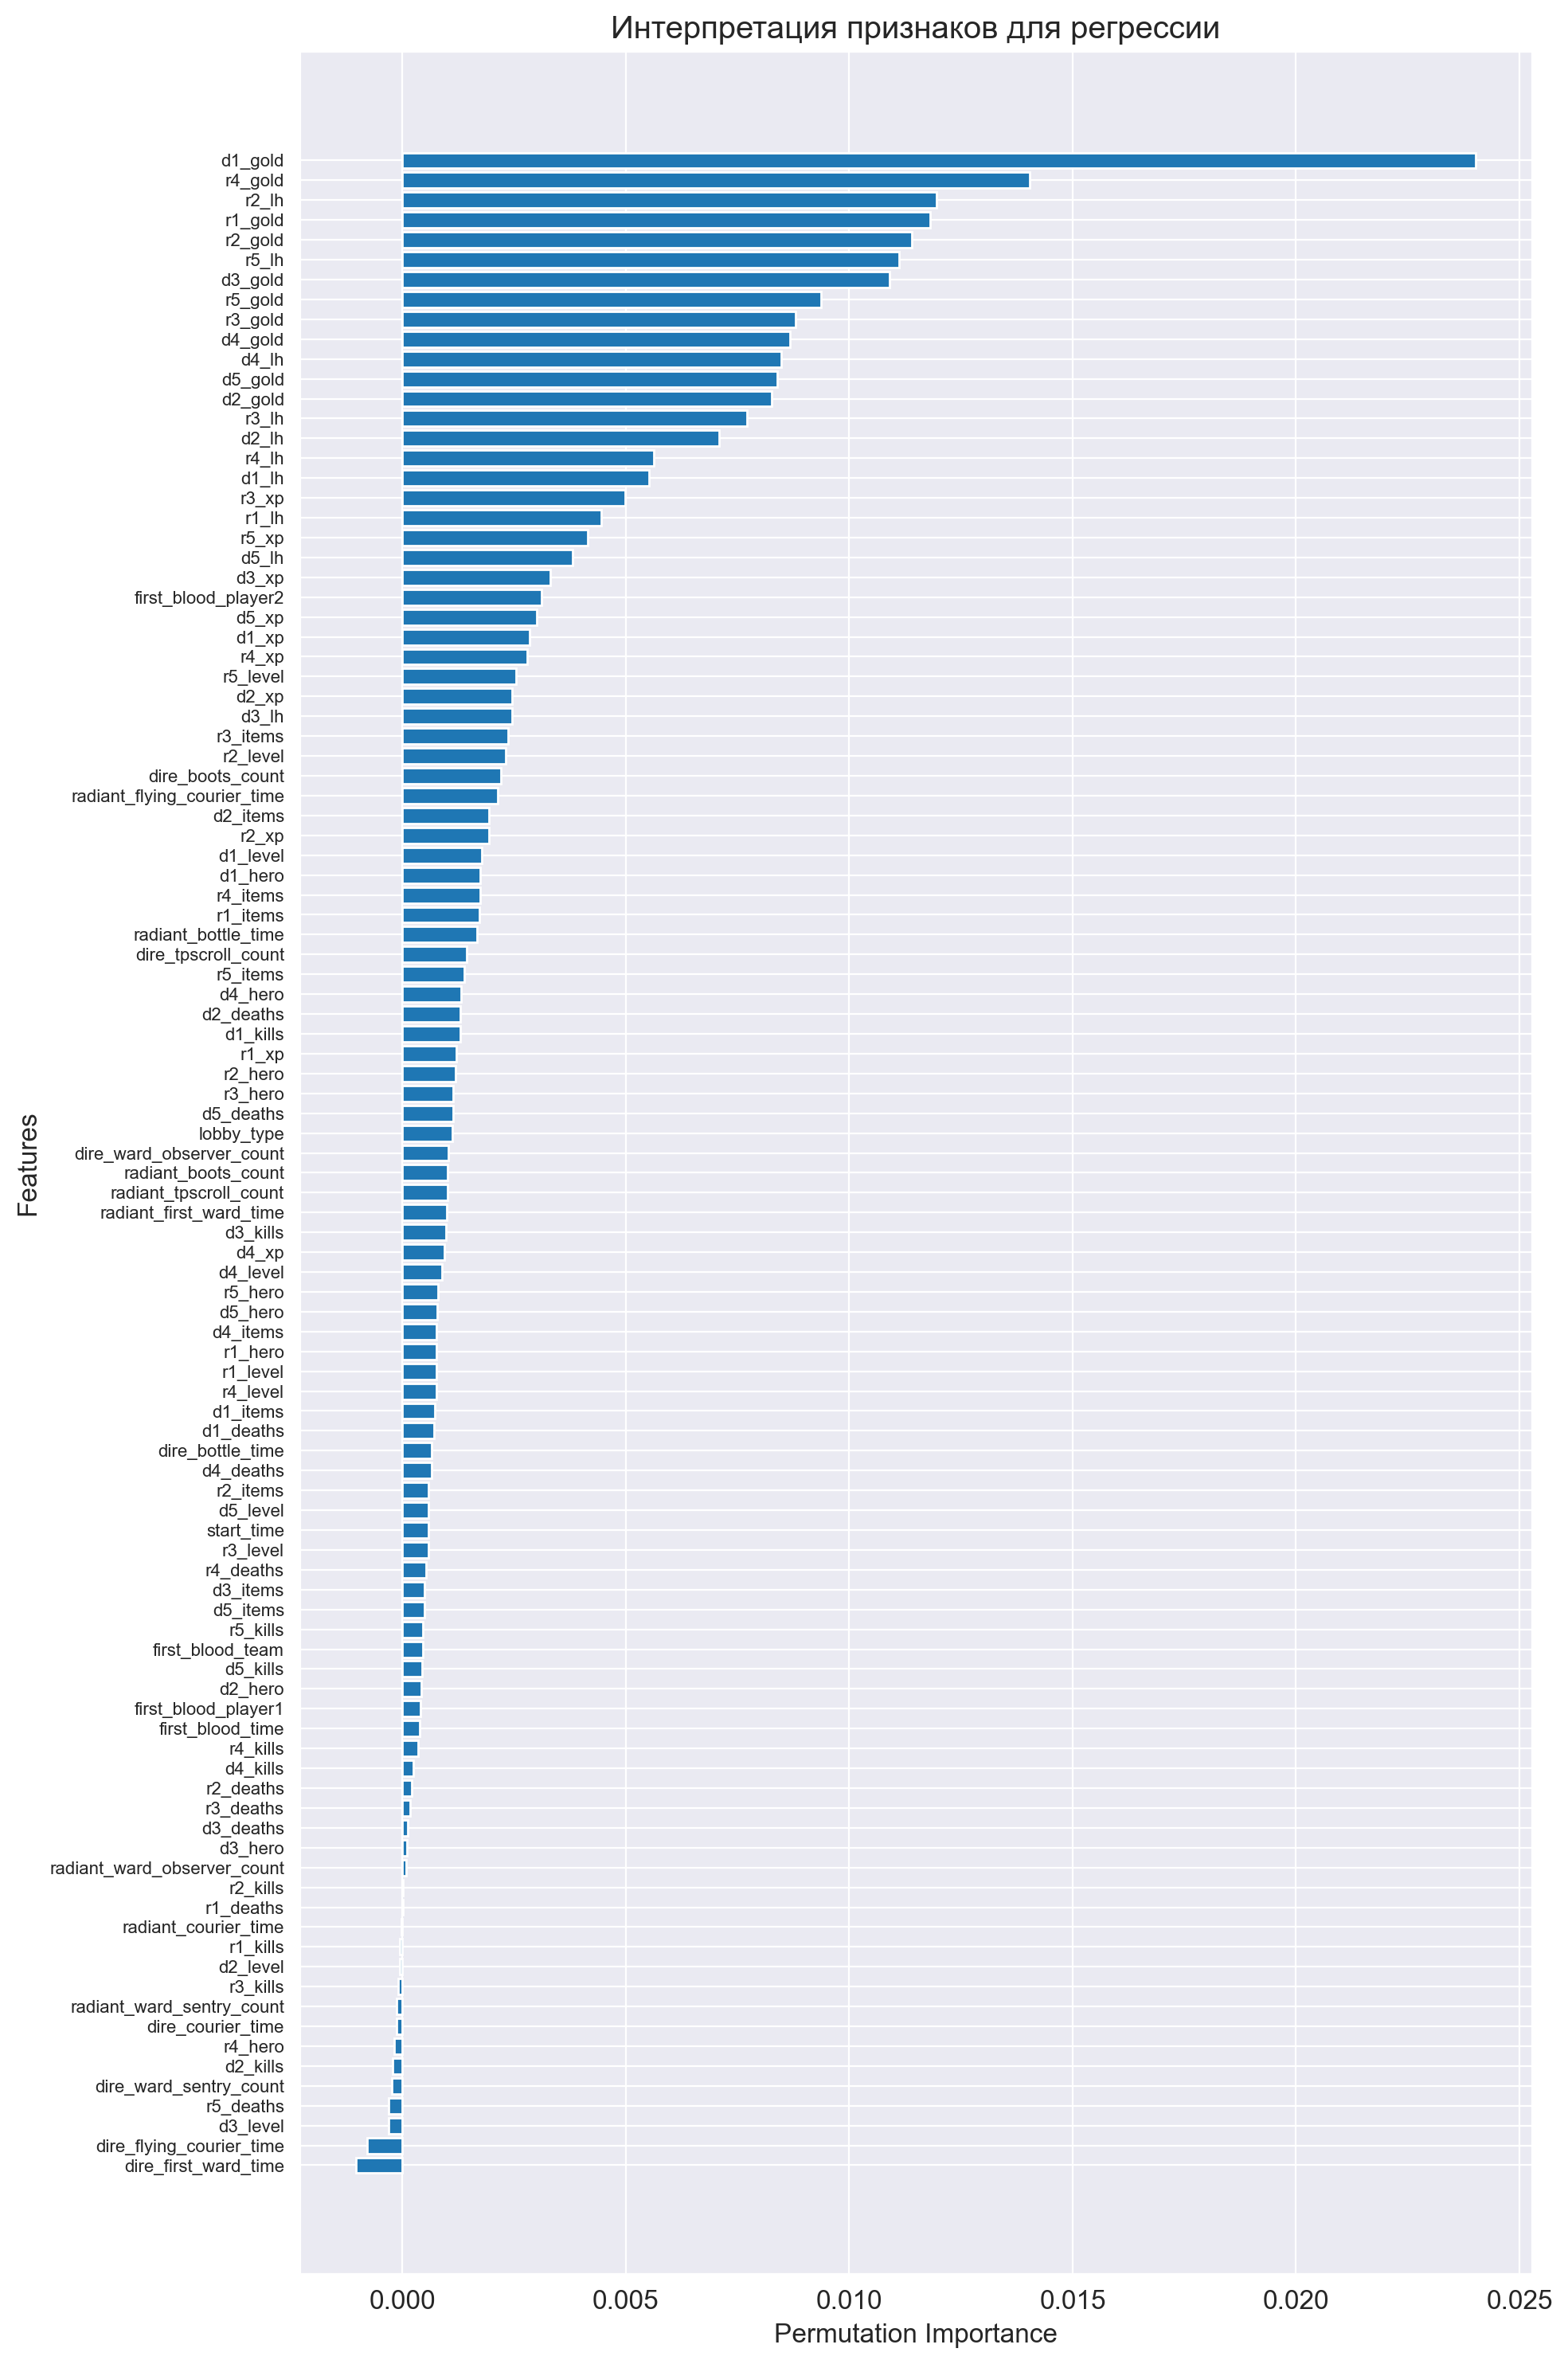

In [214]:
# Интерпретация признаков для регрессии (они были расчитаны при обучении)

plt.figure(figsize=(10, 15))
sorted_idx = importances_reg.importances_mean.argsort()  # Сортируем по убыванию важности
plt.barh(range(X.shape[1]), importances_reg.importances_mean[sorted_idx])
plt.yticks(range(X.shape[1]), [f'{X.columns[i]}' for i in sorted_idx]) # Подписи
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.yticks(fontsize=8)
plt.title('Интерпретация признаков для регрессии')
plt.tight_layout()
plt.show()

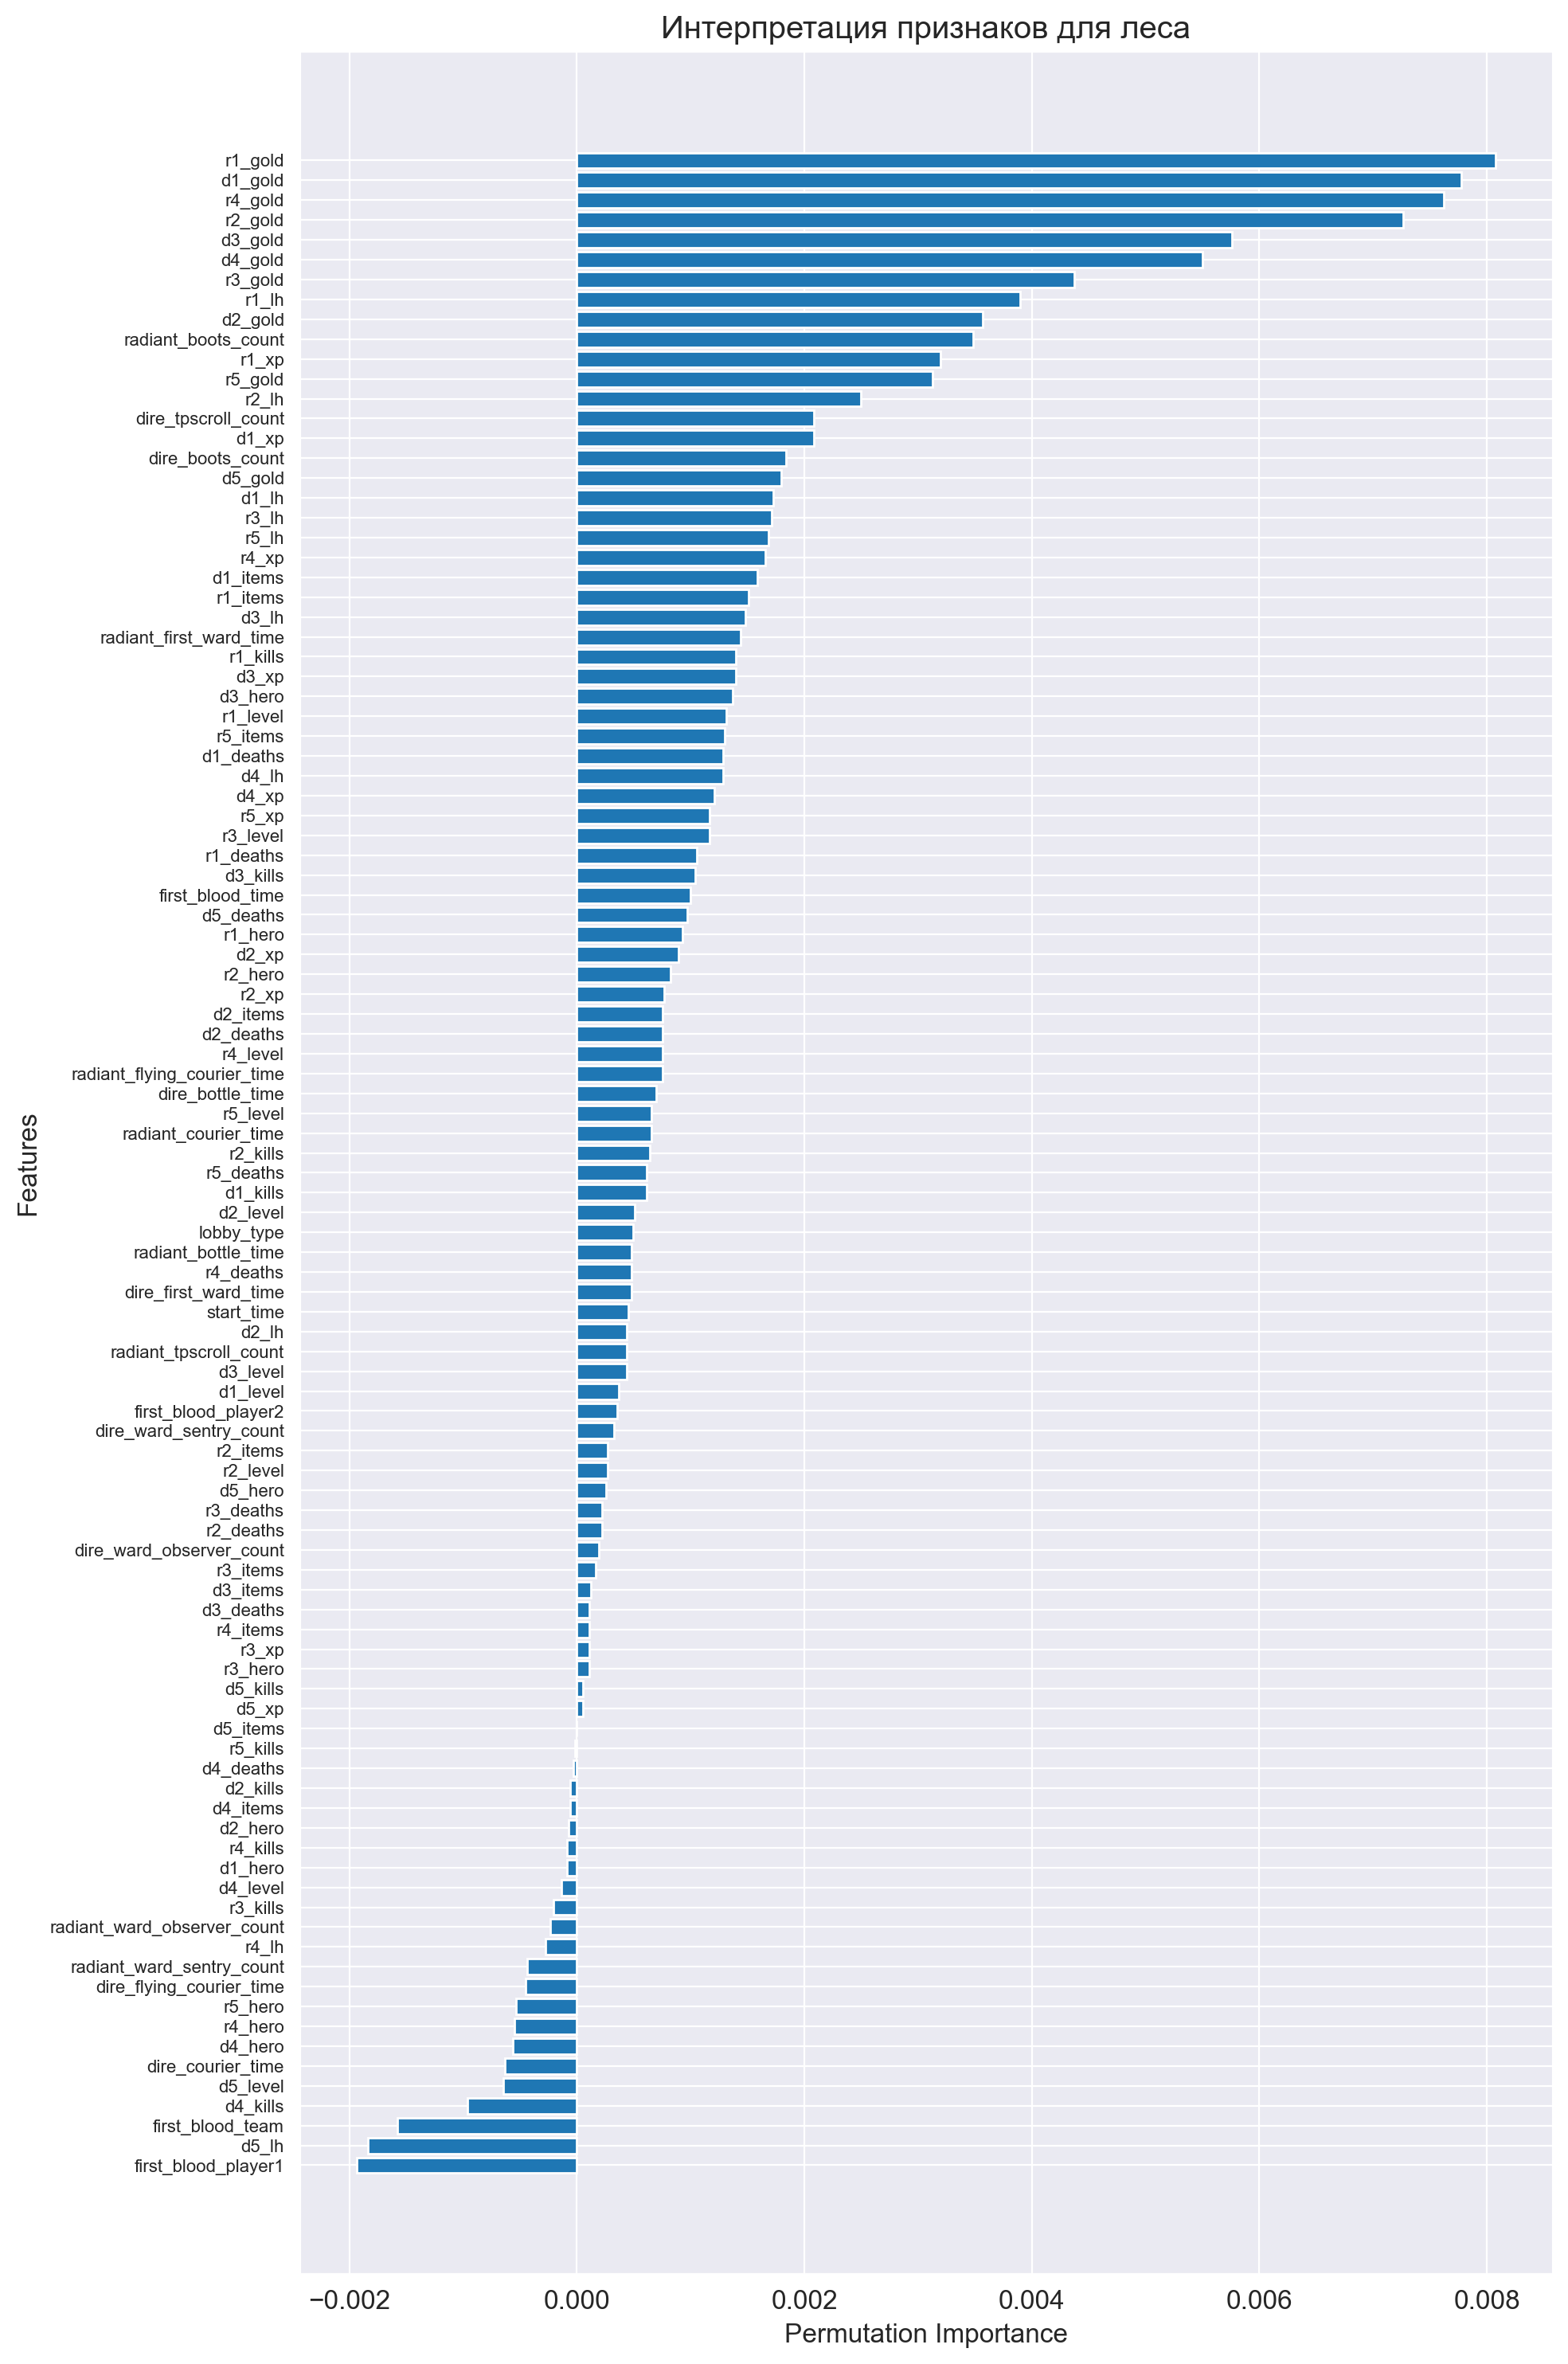

In [215]:
# Интерпретация признаков для леса (они были расчитаны при обучении)

plt.figure(figsize=(10, 15))
sorted_idx = importances_forest.importances_mean.argsort()  # Сортируем по убыванию важности
plt.barh(range(X.shape[1]), importances_forest.importances_mean[sorted_idx])
plt.yticks(range(X.shape[1]), [f'{X.columns[i]}' for i in sorted_idx]) # Подписи
plt.xlabel('Permutation Importance')
plt.ylabel('Features')
plt.yticks(fontsize=8)
plt.title('Интерпретация признаков для леса')
plt.tight_layout()
plt.show()

В обоих случаях самыми важными признаками стало количество золота у каждого игрока.

**Оценка**: В теории 10  
на практике скорее 9